# House price data analysis

In [1]:
# %pip install pipenv
# %pip install scikit-learn
# %pip install seaborn
# %pip install matplotlib
# %pip install numpy
# %pip install tensorflow
# %pip install xgboost
# %pip install ipympl
# %pip install pyod
# %pip install seaborn
# %matplotlib widget


In [36]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from data_analysis import DataAnalyzer

In [3]:
train_dataset = pd.read_csv('train.csv')
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_dataset.head(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
X_dataset = train_dataset.iloc[:,:-1]
Y_dataset = train_dataset.iloc[:,-1:]

In [8]:
data_analyzer = DataAnalyzer(force_categorical=['MSSubClass'])
data_analyzer.fit(X_dataset, Y_dataset)
print('Numerical features', data_analyzer.numerical_features)
print('Categorical features', data_analyzer.categorical_features)

Id
 => dtype: int64
 => unique (1460) ...
ID found Id
MSSubClass
 => dtype: int64
 => unique (15) [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
 => dtype: object
 => unique (5) ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
 => dtype: float64
 => nulls 259 (18%)
 => unique (111) ...
LotArea
 => dtype: int64
 => unique (1073) ...
Street
 => dtype: object
 => unique (2) ['Pave' 'Grvl']
Alley
 => dtype: object
 => nulls 1369 (94%)
 => unique (3) [nan 'Grvl' 'Pave']
LotShape
 => dtype: object
 => unique (4) ['Reg' 'IR1' 'IR2' 'IR3']
LandContour
 => dtype: object
 => unique (4) ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
 => dtype: object
 => unique (2) ['AllPub' 'NoSeWa']
LotConfig
 => dtype: object
 => unique (5) ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
 => dtype: object
 => unique (3) ['Gtl' 'Mod' 'Sev']
Neighborhood
 => dtype: object
 => unique (25) ...
Condition1
 => dtype: object
 => unique (9) ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'

In [9]:
data_encoded = data_analyzer.transform(X_dataset)
data_encoded.describe()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.059589,0.043151,0.006849,0.020548,0.367123,0.047260,0.002740,0.008219,0.098630,0.204795,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.236805,0.203266,0.082505,0.141914,0.482186,0.212268,0.052289,0.090317,0.298267,0.403690,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_encoded_with_target = pd.concat([data_encoded, Y_dataset['SalePrice']], axis=1)
data_encoded_with_target.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000


In [11]:

data_encoded_with_target.to_csv('./train_encoded.csv', index=False)

In [12]:
data_analyzer.df_target_corr

,y
1stFlrSF,NaN
2ndFlrSF,NaN
3SsnPorch,NaN
BedroomAbvGr,NaN
BsmtFinSF1,NaN
BsmtFinSF2,NaN
BsmtFullBath,NaN
BsmtHalfBath,NaN
BsmtUnfSF,NaN
EnclosedPorch,NaN


### Highly correlated numerical features with the target 

In [13]:
data_analyzer.get_target_correlated()

[]

In [14]:
data_analyzer.get_correlated_features()

[('OverallQual', 'YearBuilt'),
 ('OverallQual', 'YearRemodAdd'),
 ('OverallQual', 'TotalBsmtSF'),
 ('OverallQual', 'GrLivArea'),
 ('OverallQual', 'FullBath'),
 ('OverallQual', 'GarageYrBlt'),
 ('OverallQual', 'GarageCars'),
 ('OverallQual', 'GarageArea'),
 ('YearBuilt', 'YearRemodAdd'),
 ('YearBuilt', 'GarageYrBlt'),
 ('YearBuilt', 'GarageCars'),
 ('YearRemodAdd', 'GarageYrBlt'),
 ('BsmtFinSF1', 'TotalBsmtSF'),
 ('BsmtFinSF1', 'BsmtFullBath'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('1stFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'HalfBath'),
 ('2ndFlrSF', 'BedroomAbvGr'),
 ('2ndFlrSF', 'TotRmsAbvGrd'),
 ('GrLivArea', 'FullBath'),
 ('GrLivArea', 'BedroomAbvGr'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('FullBath', 'TotRmsAbvGrd'),
 ('BedroomAbvGr', 'TotRmsAbvGrd'),
 ('GarageYrBlt', 'GarageCars'),
 ('GarageYrBlt', 'GarageArea'),
 ('GarageCars', 'GarageArea')]

## Target

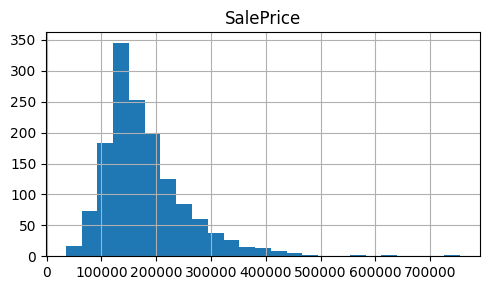

In [15]:
data_analyzer.plot_output_pdfs()

In [16]:
y_zscore = stats.zscore(Y_dataset['SalePrice'])
df_zscore = Y_dataset['SalePrice'].to_frame()
df_zscore['zscore'] = y_zscore
df_zscore.query('zscore > 3.0').sort_values(by='SalePrice')

,SalePrice,zscore
664,423000,3.048264
1142,424870,3.071811
389,426000,3.086040
496,430000,3.136409
349,437154,3.226492
58,438780,3.246967
473,440000,3.262329
527,446261,3.341168
591,451950,3.412804
1243,465000,3.577130


In [17]:
Y_dataset.query('SalePrice > 400000').count()

SalePrice    28
dtype: int64

## Variables

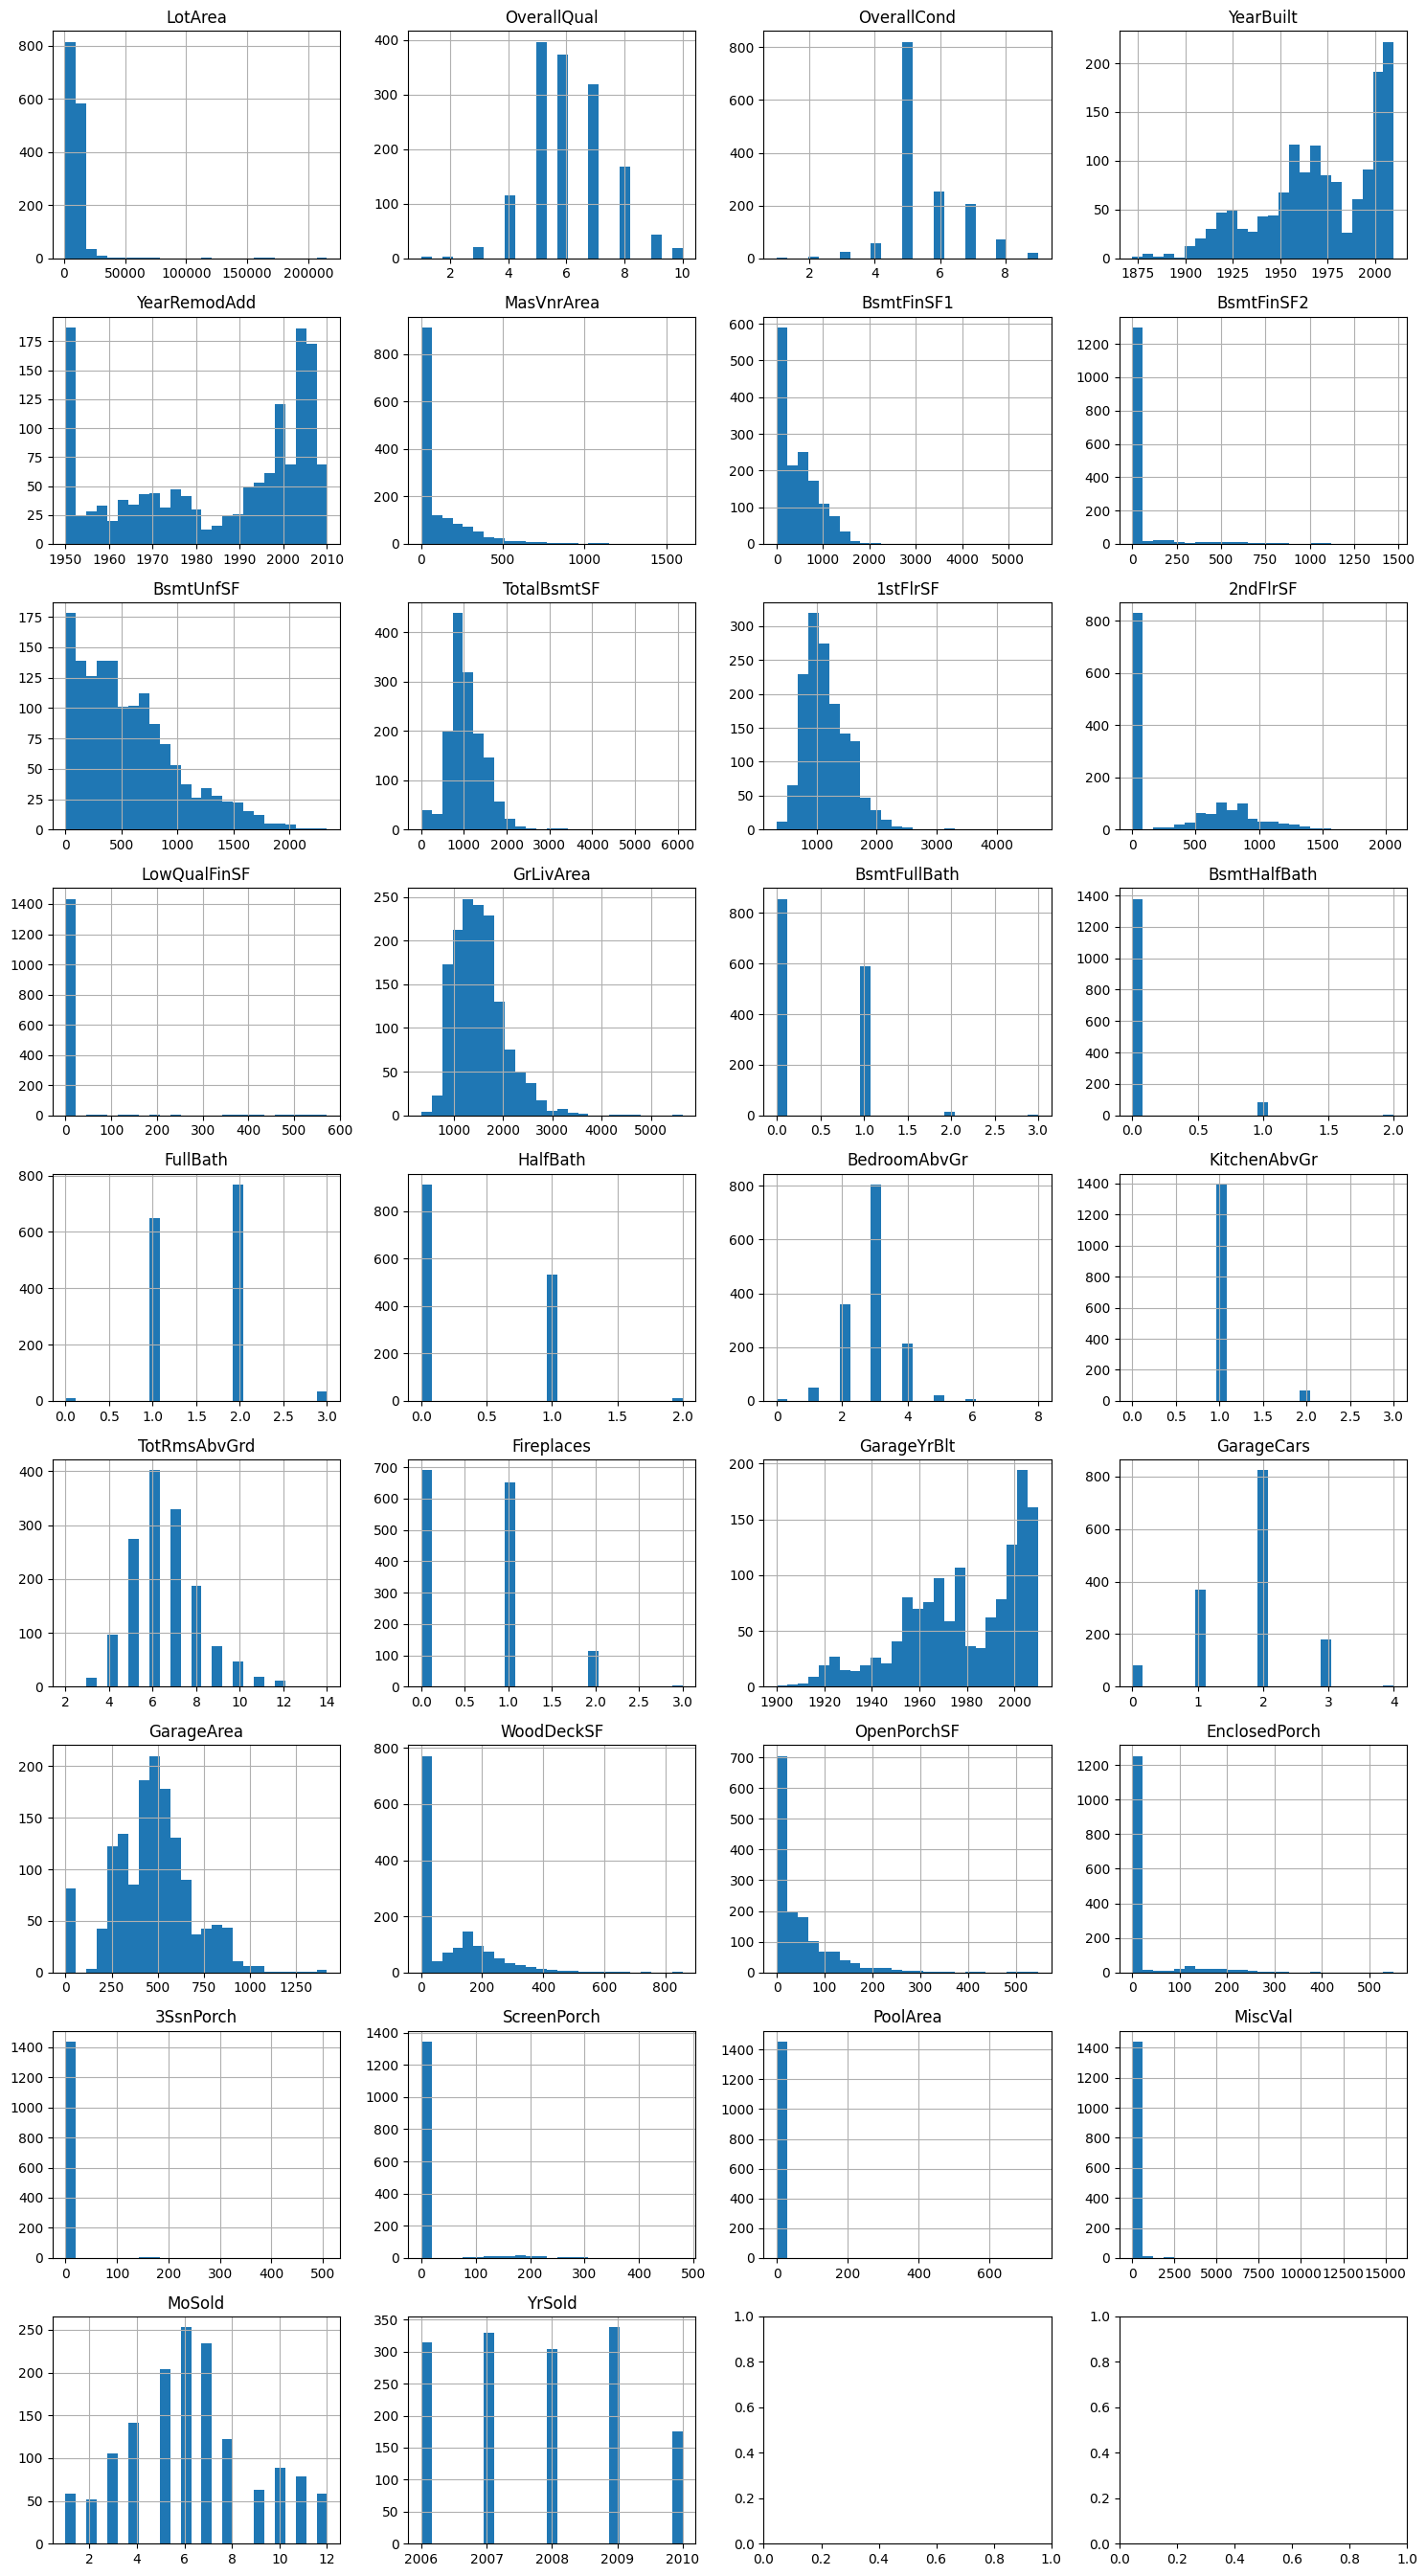

In [18]:
data_analyzer.plot_input_pdfs()

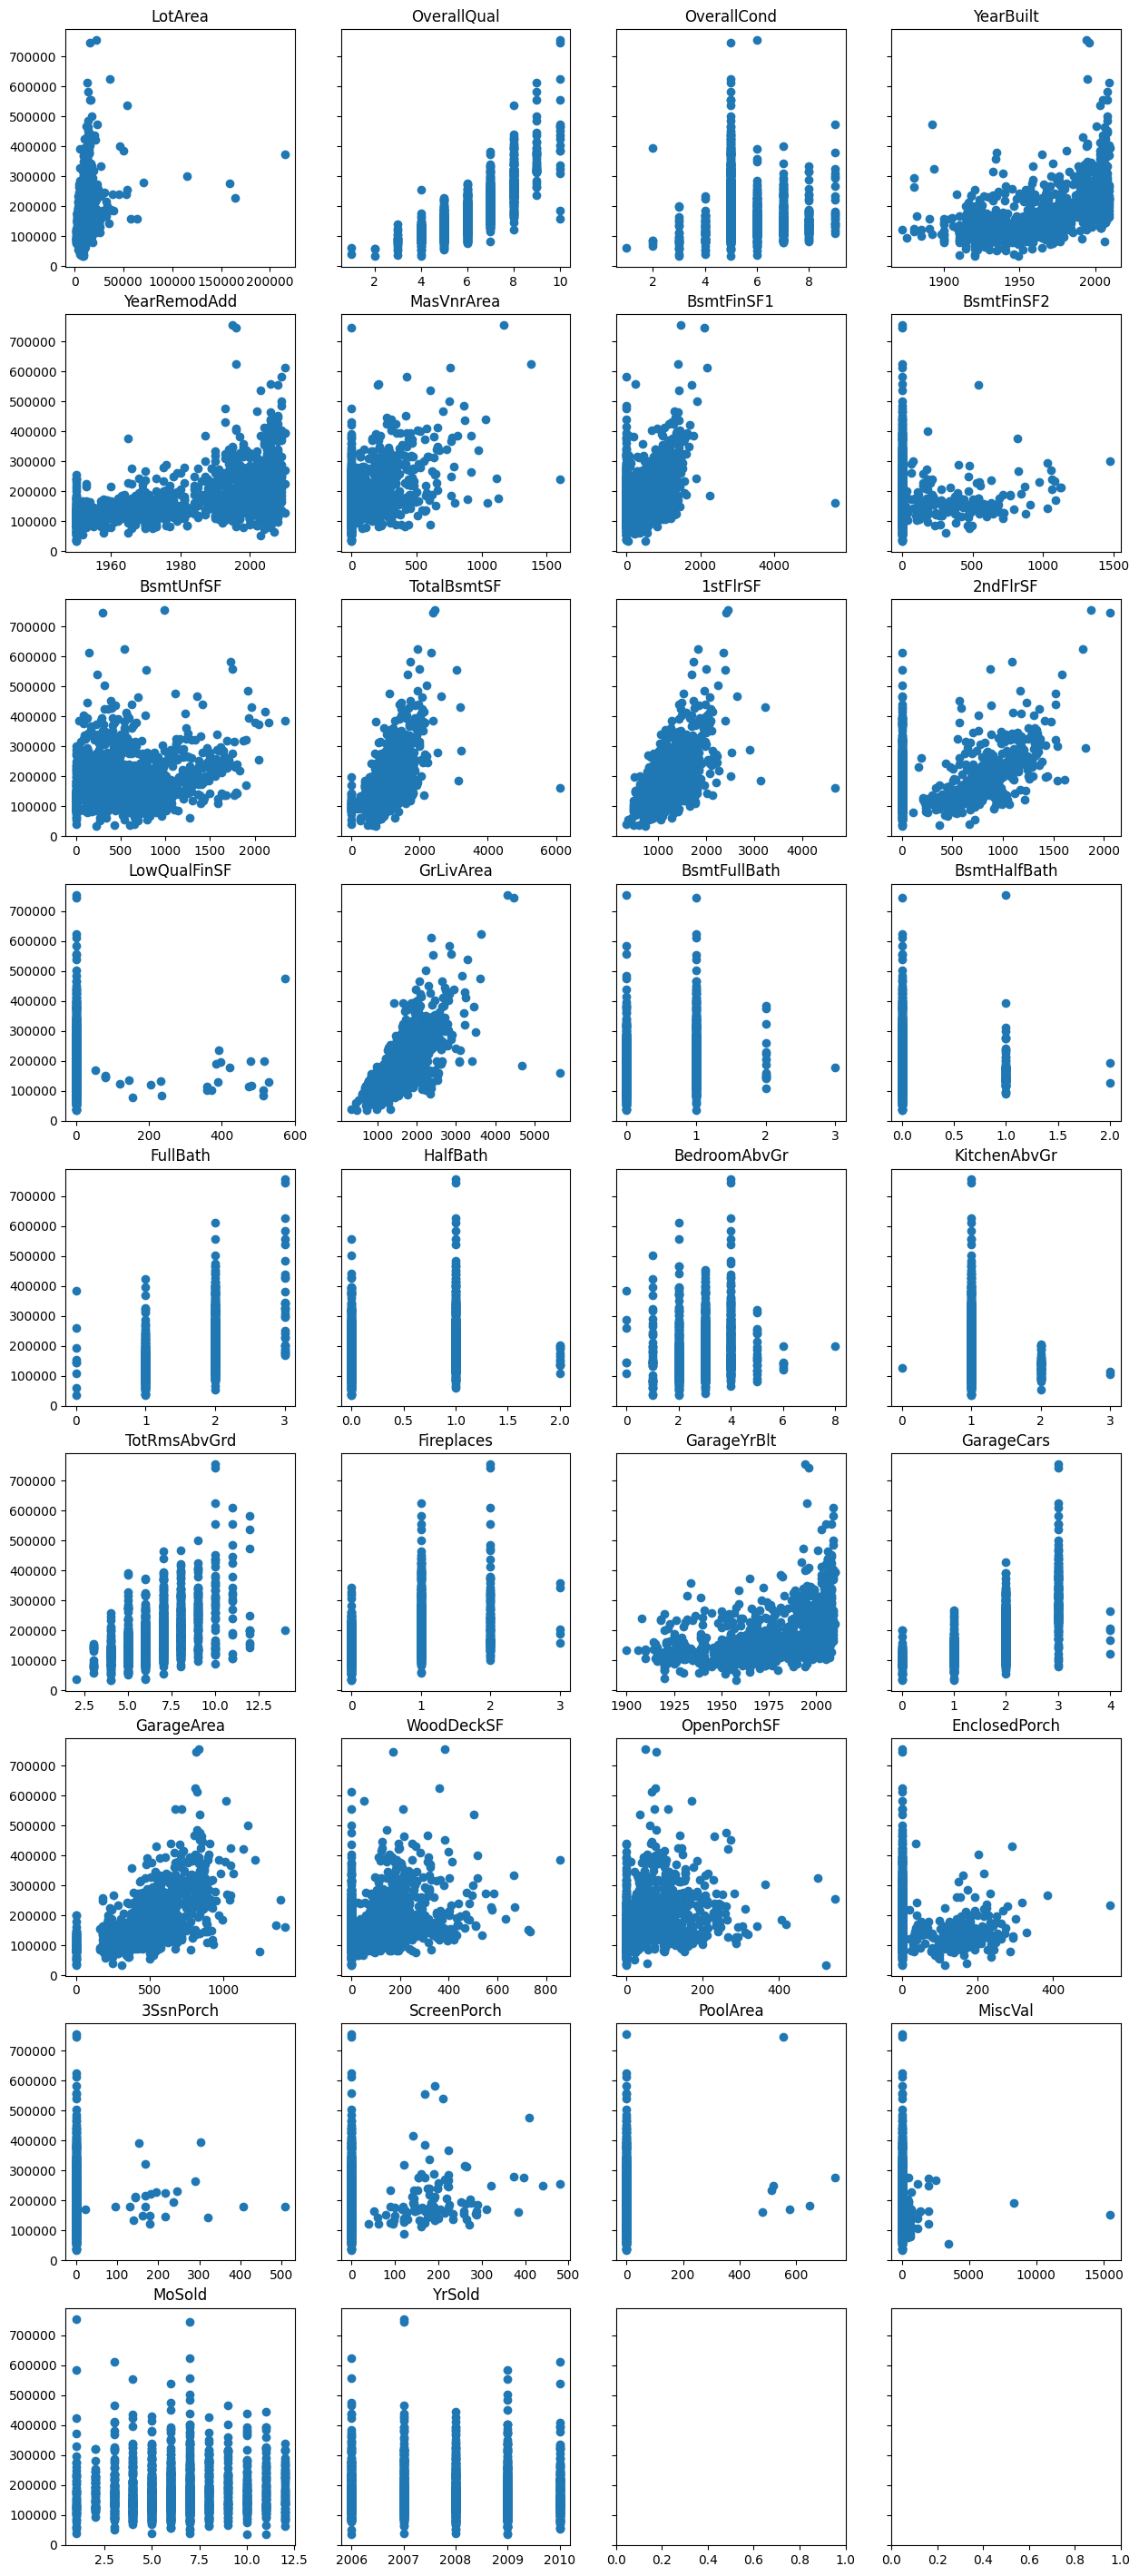

In [19]:
data_analyzer.plot_feature_target_xy()

## Categorical features

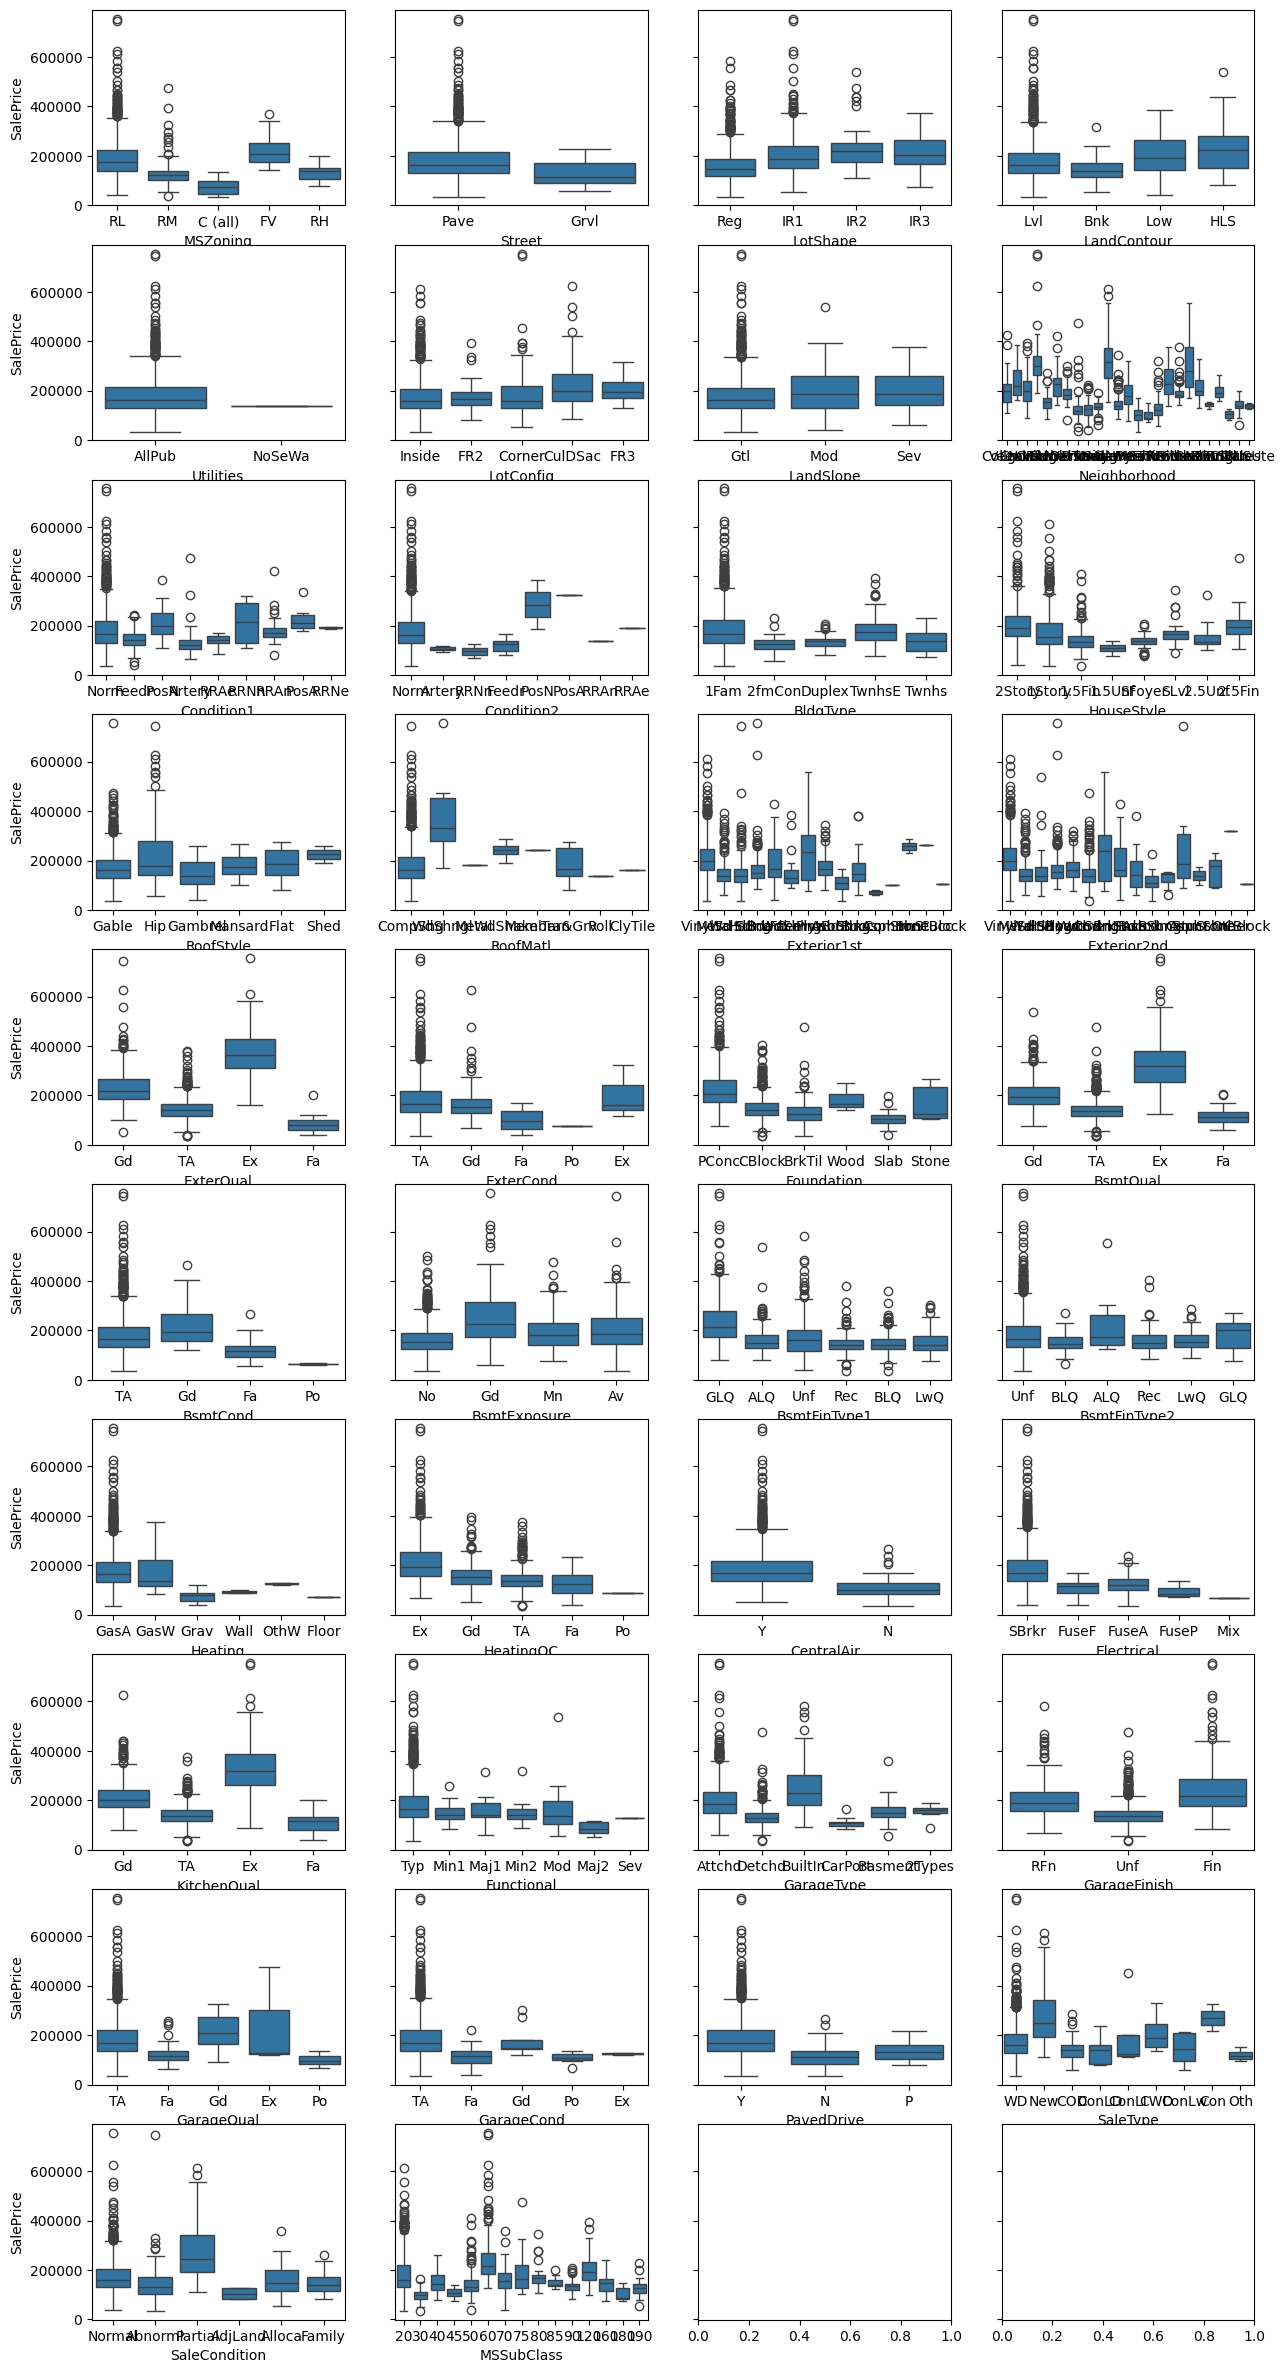

In [20]:
data_analyzer.plot_input_cat()

## Checking test dataset

In [21]:
X_test = pd.read_csv('test.csv')
print(X_test.shape)

(1459, 80)


In [22]:
test_analyzer = DataAnalyzer()
test_analyzer.fit(X_test, None)

Id
 => dtype: int64
 => unique (1459) ...
ID found Id
MSSubClass
 => dtype: int64
 => unique (16) [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]
MSZoning
 => dtype: object
 => nulls 4 (0%)
 => unique (6) ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
LotFrontage
 => dtype: float64
 => nulls 227 (16%)
 => unique (116) ...
LotArea
 => dtype: int64
 => unique (1106) ...
Street
 => dtype: object
 => unique (2) ['Pave' 'Grvl']
Alley
 => dtype: object
 => nulls 1352 (93%)
 => unique (3) [nan 'Pave' 'Grvl']
LotShape
 => dtype: object
 => unique (4) ['Reg' 'IR1' 'IR2' 'IR3']
LandContour
 => dtype: object
 => unique (4) ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities
 => dtype: object
 => nulls 2 (0%)
 => unique (2) ['AllPub' nan]
LotConfig
 => dtype: object
 => unique (5) ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope
 => dtype: object
 => unique (3) ['Gtl' 'Mod' 'Sev']
Neighborhood
 => dtype: object
 => unique (25) ...
Condition1
 => dtype: object
 => unique (9) ['Feedr' 'Norm' 'PosN' 'RRNe'

## PCA data analysis

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca_data = scaler.fit_transform(data_scaled)


NameError: name 'data_scaled' is not defined

#### 2D PCA

Explained variance ratio: [0.06493174 0.03008758]


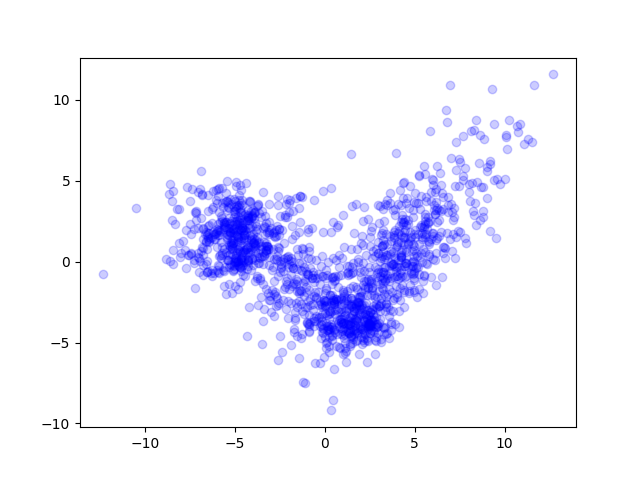

In [ ]:
pca2 = PCA(n_components=2)
pca2_output = pca2.fit_transform(pca_data)
print('Explained variance ratio:',pca2.explained_variance_ratio_)


fig, ax = plt.subplots()
ax.scatter(pca2_output[:,0], pca2_output[:,1], color='blue', alpha=0.2)
plt.show()


#### 3D PCA

Explained variance ratio: [0.06493174 0.03008759 0.0265237 ]


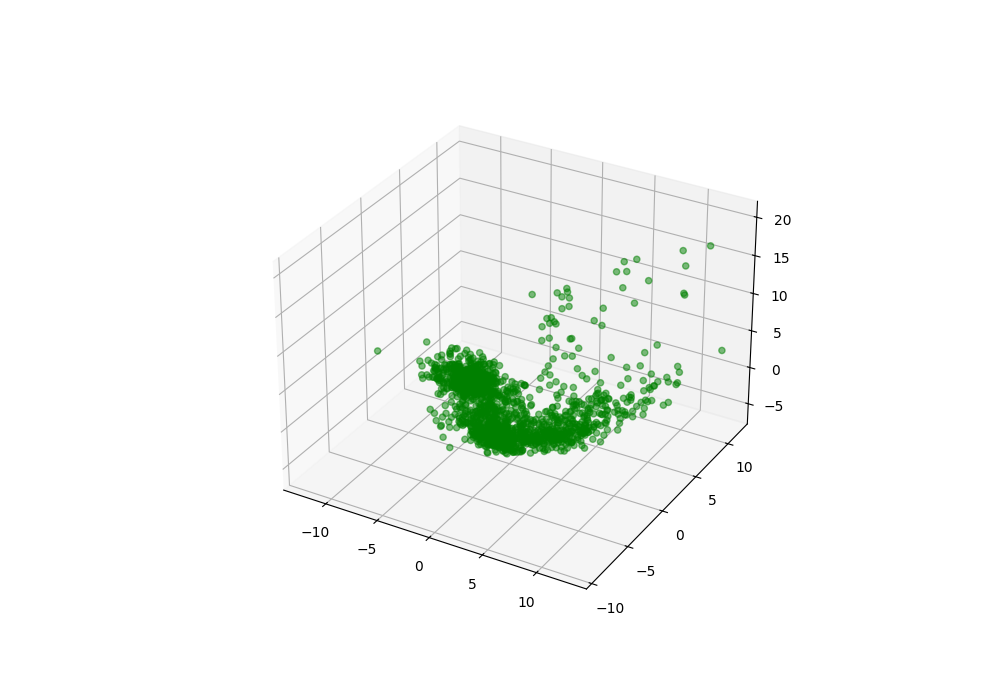

In [ ]:
from matplotlib import cm

pca3 = PCA(n_components=3)
pca3_output = pca3.fit_transform(pca_data)
print('Explained variance ratio:',pca3.explained_variance_ratio_)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(pca3_output[:,0],pca3_output[:,1],pca3_output[:,2], c='green', alpha=0.5)
 
# show plot
plt.show()

Explained variance ratio: [0.06493174 0.03008759 0.02652369 0.02327438]


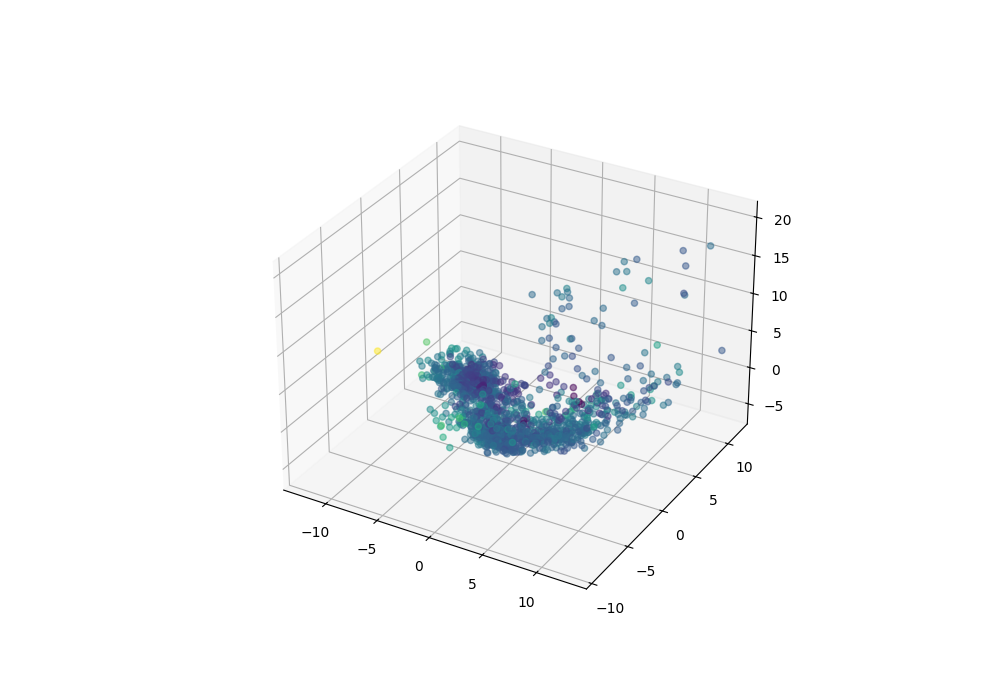

In [ ]:
pca4 = PCA(n_components=4)
pca4_output = pca4.fit_transform(pca_data)
print('Explained variance ratio:',pca4.explained_variance_ratio_)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(pca4_output[:,0], pca4_output[:,1], pca4_output[:,2], c=pca4_output[:,3], alpha=0.5)
 
# show plot
plt.show()

## Detect outliers

Outliers data: shape=(1460, 35)
Outliers: 59.0
(1401, 35)
(59, 35)


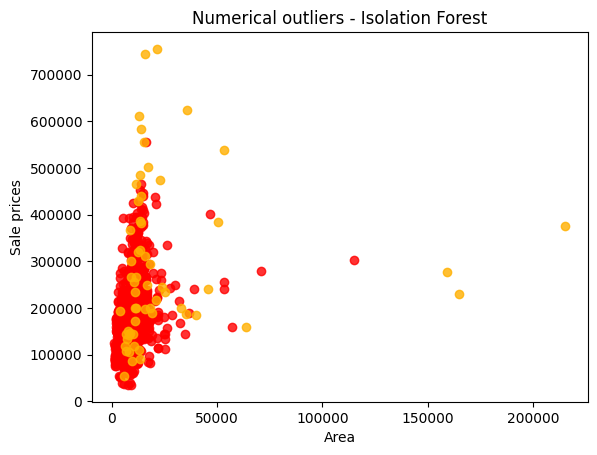

Outliers: 59.0
Outliers: 123
(1337, 35)
(123, 35)


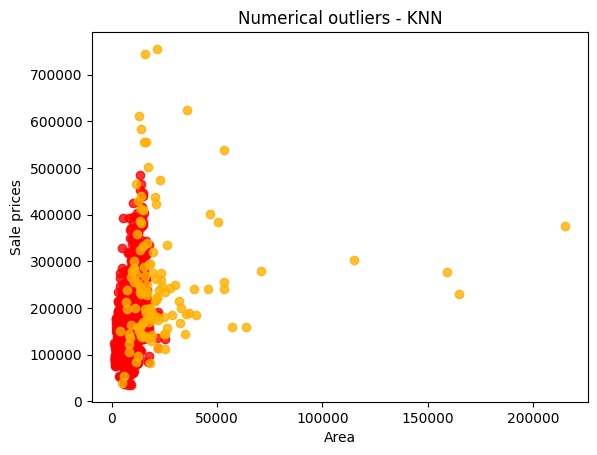

Outliers: 123


In [34]:
from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import NearestNeighbors
from pyod.models.knn import KNN

def prepare_outliers_data():
    imputer = SimpleImputer(strategy='mean')
    data = imputer.fit_transform(train_dataset[data_analyzer.numerical_features + ['SalePrice']])
    print(f'Outliers data: shape={data.shape}')
    return data

def analyze_outliers_model(model, data, title):
    model.fit(data[:,:-1])
    labels = model.predict(data[:,:-1])
    if isinstance(model, IsolationForest):
        labels = -0.5 * labels + 0.5   # rescale to 0/1
    n_outliers = np.sum(labels)
    print(f'Outliers: {n_outliers}')

    cmap = plt.get_cmap('prism')
    fig, ax = plt.subplots()
    for c in range(2):
        group_data = data[labels == c]
        print(group_data.shape)
        ax.scatter(group_data[:,0], group_data[:,-1], color=cmap(5*c), marker='o', alpha=0.8)
    plt.xlabel('Area')
    plt.ylabel('Sale prices')
    plt.title(title)
    plt.show()
    print(f'Outliers: {n_outliers}')

def detect_outliers():
    data = prepare_outliers_data()
    model = IsolationForest(n_estimators=100, max_samples=500)
    analyze_outliers_model(model, data, title='Numerical outliers - Isolation Forest')
    model = KNN(n_neighbors=3)
    analyze_outliers_model(model, data, title='Numerical outliers - KNN')

detect_outliers()


In [ ]:
# inliers.to_csv('train_inliers.csv')